<a href="https://colab.research.google.com/github/Ohara124c41/GCD-Predictive_Analytics/blob/main/interactiveDashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0xdeadbeef)

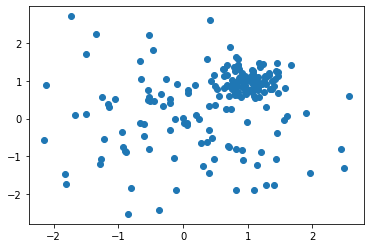

In [2]:
sample1 = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 100)
sample2 = np.random.multivariate_normal([1,1], [[0.05,0],[0,0.05]], 100)
sample = np.concatenate([sample1, sample2])
plt.scatter(sample[:,0],sample[:,1])

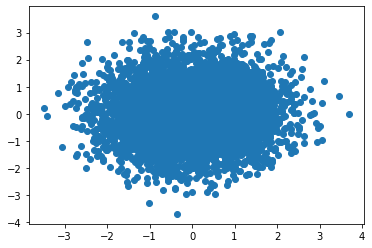

In [3]:
sample1 = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 5000)
sample2 = np.random.multivariate_normal([1,1], [[0.05,0],[0,0.05]], 5000)
sample = np.concatenate([sample1, sample2])
plt.scatter(sample[:,0],sample[:,1])

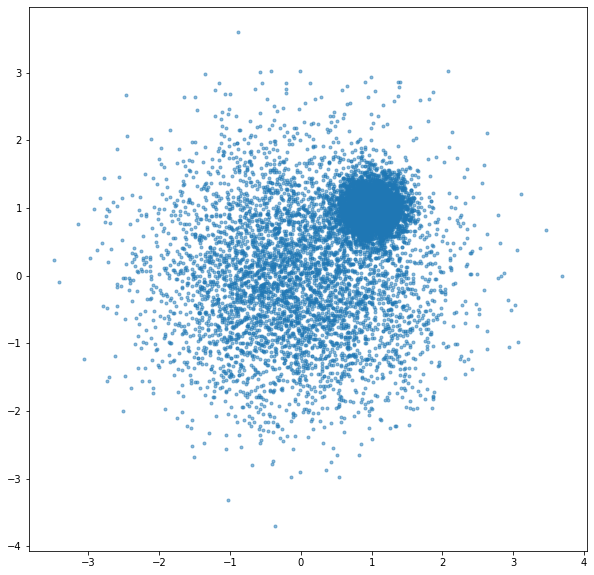

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(sample[:,0],sample[:,1], alpha=0.5, marker='.')

In [5]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

In [6]:
tools = "hover, box_zoom, undo, crosshair"
p = figure(tools=tools)
p.scatter(sample[:,0], sample[:,1], alpha=0.5)
show(p)

In [7]:
from bokeh.models import ColumnDataSource, HoverTool
import pandas as pd 

In [8]:
df = pd.DataFrame(sample, columns=('x','y'))
df.head()

,x,y
0,0.849694,1.881592
1,0.394075,0.958888
2,-1.749096,-0.054847
3,0.859521,-0.815819
4,-0.772113,-0.605808


In [9]:
df['value'] = np.sqrt(df['x']**2 + df['y']**2)
df.head()

,x,y,value
0,0.849694,1.881592,2.064550
1,0.394075,0.958888,1.036707
2,-1.749096,-0.054847,1.749955
3,0.859521,-0.815819,1.185047
4,-0.772113,-0.605808,0.981408


In [10]:
source = ColumnDataSource(df)
tools = "box_zoom, undo, crosshair"
p = figure(tools=tools)
p.scatter('x','y', source=source, alpha=0.5)
p.add_tools(
    HoverTool(
        tooltips=[('value','@value{2.2f}'), 
                  ('index', '@index')]
    )
)
show(p)

In [11]:
df.loc[1034]


x        2.075677
y        3.030386
value    3.673101
Name: 1034, dtype: float64

In [12]:
from bokeh.layouts import grid
from bokeh.models import Button, TextInput

def modify_doc(doc):
    # same as before
    source = ColumnDataSource(df)
    p = figure(tools=tools)
    p.scatter('x','y', source=source, alpha=0.5)
    p.add_tools(
        HoverTool(
            tooltips=[('value','@value{2.2f}'), 
                      ('index', '@index')]
        )
    )
    
    # this function is called when the button is clicked
    def update():
        # number of points to be added, taken from input text box
        n = int(npoints.value)
        # new sample of points to be added. 
        # we use the a narrow gaussian centred on (-1, 1), 
        # and draw the requested number of points
        sample3 = np.random.multivariate_normal([-1,-1], [[0.05,0],[0,0.05]], n)
        df_new = pd.DataFrame(sample3, columns=('x','y'))
        df_new['value'] = np.sqrt(df['x']**2 + df['y']**2)
        # only the new data is streamed to the bokeh server, 
        # which is an efficient way to proceed
        source.stream(df_new)
    
    # GUI: 
    button = Button(label='add points:')
    npoints = TextInput(value="50")
    button.on_click(update)
    # arranging the GUI and the plot. 
    layout = grid([[button, npoints], p])
    doc.add_root(layout)

show(modify_doc)

Bokeh show_app is currently unsupported


In [29]:
import os
import ipywidgets as widgets
!pip install bqplot

from bqplot import *
import numpy as np
import pandas as pd
!pip install qgrid
import qgrid

In [30]:
# create DataFrame for team data
columns = ['name', 'id', 'x', 'y']

tottenham_players = [
    ['Lloris', 1, 0.1, 0.5],
    ['Trippier', 2, 0.2, 0.25],
    ['Alderweireld', 4, 0.2, 0.4],
    ['Vertonghen', 5, 0.2, 0.6],
    ['D. Rose', 3, 0.2, 0.75],
    ['Sissoko', 17, 0.3, 0.4],
    ['Winks', 8, 0.3, 0.6], 
    ['Eriksen', 23, 0.4, 0.25],
    ['Alli', 20, 0.4, 0.5],
    ['Son', 7, 0.4, 0.75],
    ['H. Kane', 10, 0.45, 0.5]
]

temp_tottenham = pd.DataFrame.from_records(tottenham_players, columns=columns)
temp_tottenham['team'] = 'Tottenham Hotspur'
temp_tottenham['jersey'] = 'Blue'

liverpool_players = [
    ['Alisson', 13, 0.9, 0.5],
    ['Alexander-Arnold', 66, 0.8, 0.75],
    ['Matip', 32, 0.8, 0.6],
    ['van Dijk', 4, 0.8, 0.4],
    ['Robertson', 26, 0.8, 0.25],
    ['J. Henderson', 14, 0.7, 0.7],
    ['Fabinho', 3, 0.7, 0.5],
    ['Wijnaldum', 5, 0.7, 0.3],
    ['Salah', 11, 0.6, 0.75],
    ['Roberto Firmino', 9, 0.6, 0.5],
    ['Mané', 10, 0.6, 0.25] 
]

temp_liverpool = pd.DataFrame.from_records(liverpool_players, columns=columns)
temp_liverpool['team'] = 'FC Liverpool'
temp_liverpool['jersey'] = 'Red'

teams = pd.concat([temp_tottenham, temp_liverpool], axis=0, ignore_index=True)

In [31]:
# Define bqplot Image mark

# read pitch image
image_path = os.path.abspath('pitch.png')

with open(image_path, 'rb') as f:
    raw_image = f.read()
ipyimage = widgets.Image(value=raw_image, format='png')

scales_image = {'x': LinearScale(), 'y': LinearScale()}
axes_options = {'x': {'visible': False}, 'y': {'visible': False}}

image = Image(image=ipyimage, scales=scales_image, axes_options=axes_options)
# Full screen
image.x = [0, 1]
image.y = [0, 1]

In [32]:
# Define qgrid widget
qgrid.set_grid_option('maxVisibleRows', 10)
col_opts = { 
    'editable': False,
}

def on_row_selected(change):
    """callback for row selection: update selected points in scatter plot"""
    filtered_df = qgrid_widget.get_changed_df()           
    team_scatter.selected = filtered_df.iloc[change.new].index.tolist()
    
        
qgrid_widget = qgrid.show_grid(teams, show_toolbar=False, column_options=col_opts)
qgrid_widget.observe(on_row_selected, names=['_selected_rows'])
qgrid_widget.layout = widgets.Layout(width='920px')

In [33]:
# Define scatter plot for team data
scales={'x': LinearScale(min=0, max=1), 'y': LinearScale(min=0, max=1)}
axes_options = {'x': {'visible': False}, 'y': {'visible': False}}

team_scatter = Scatter(x=teams['x'], y=teams['y'],
                    names=teams['name'],
                    scales= scales, 
                    default_size=128,
                    interactions={'click': 'select'},
                    selected_style={'opacity': 1.0, 'stroke': 'Black'},
                    unselected_style={'opacity': 0.6},
                    axes_options=axes_options)
team_scatter.colors = teams['jersey'].values.tolist()
team_scatter.enable_move = True

# Callbacks
def change_callback(change):
    qgrid_widget.change_selection(change.new)
        
def callback_update_qgrid(name, cell):
    new_x = round(cell['point']['x'], 2)
    new_y = round(cell['point']['y'], 2)
    
    qgrid_widget.edit_cell(cell['index'], 'x', new_x)
    qgrid_widget.edit_cell(cell['index'], 'y', new_y)
    
    
team_scatter.observe(change_callback, names=['selected'])
team_scatter.on_drag_end(callback_update_qgrid)

In [34]:
# Define football pitch widget
pitch_widget = Figure(marks=[image, team_scatter], padding_x=0, padding_y=0)
pitch_app = widgets.VBox([pitch_widget, qgrid_widget])

In [35]:
# Hack for increasing image size and keeping aspect ratio
width = 506.7
height = 346.7
factor = 1.8
pitch_widget.layout = widgets.Layout(width=f'{width*factor}px', height=f'{height*factor}px')

In [36]:
pitch_app